# Global Human Settlement (S2-GHS) Layer

In [1]:
# Sentinel Hub
from sentinelhub import (
    SHConfig, DataCollection, Geometry, BBox, CRS,
    SentinelHubRequest, filter_times, bbox_to_dimensions, MimeType,
    SentinelHubBYOC, ByocCollection, ByocTile, ByocCollectionAdditionalData,
    DownloadFailedException
)

In [2]:
config = SHConfig()
config.sh_base_url = 'https://creodias.sentinel-hub.com'

In [3]:
byoc = DataCollection.define(
        name='Global Human Settlement',
        api_id='byoc-3dbeea2c-3207-4c65-8a73-c29ce2675f89',  #Type
        catalog_id='3dbeea2c-3207-4c65-8a73-c29ce2675f89', # collection_id
        service_url='https://creodias.sentinel-hub.com', # End point
        is_timeless=False
    )
byoc

<DataCollection.Global Human Settlement: DataCollectionDefinition(
  api_id: byoc-3dbeea2c-3207-4c65-8a73-c29ce2675f89
  catalog_id: 3dbeea2c-3207-4c65-8a73-c29ce2675f89
  service_url: https://creodias.sentinel-hub.com
  is_timeless: False
  has_cloud_coverage: False
)>

In [4]:
from sentinelhub import bbox_to_dimensions

bbox = BBox([ -2.8, 51.2, -2.2, 51.8], crs=CRS.WGS84)
size = bbox_to_dimensions( bbox, resolution=40 )

evalscript = """
//VERSION=3
function setup() {
  return {
    input: [ "PROB", "dataMask"],
    output: { bands: 2, sampleType: "FLOAT32"}
  };
}

function evaluatePixel(sample) {
  return [ sample.PROB,
           sample.dataMask
           ];
}
"""

byoc_request = SentinelHubRequest(
    evalscript=evalscript,
    input_data=[
        SentinelHubRequest.input_data(
            data_collection=byoc
        )],
    responses=[
        SentinelHubRequest.output_response('default', MimeType.TIFF)
    ],
    bbox=bbox,
    size=size,
    config=config
)

byoc_data = byoc_request.get_data()

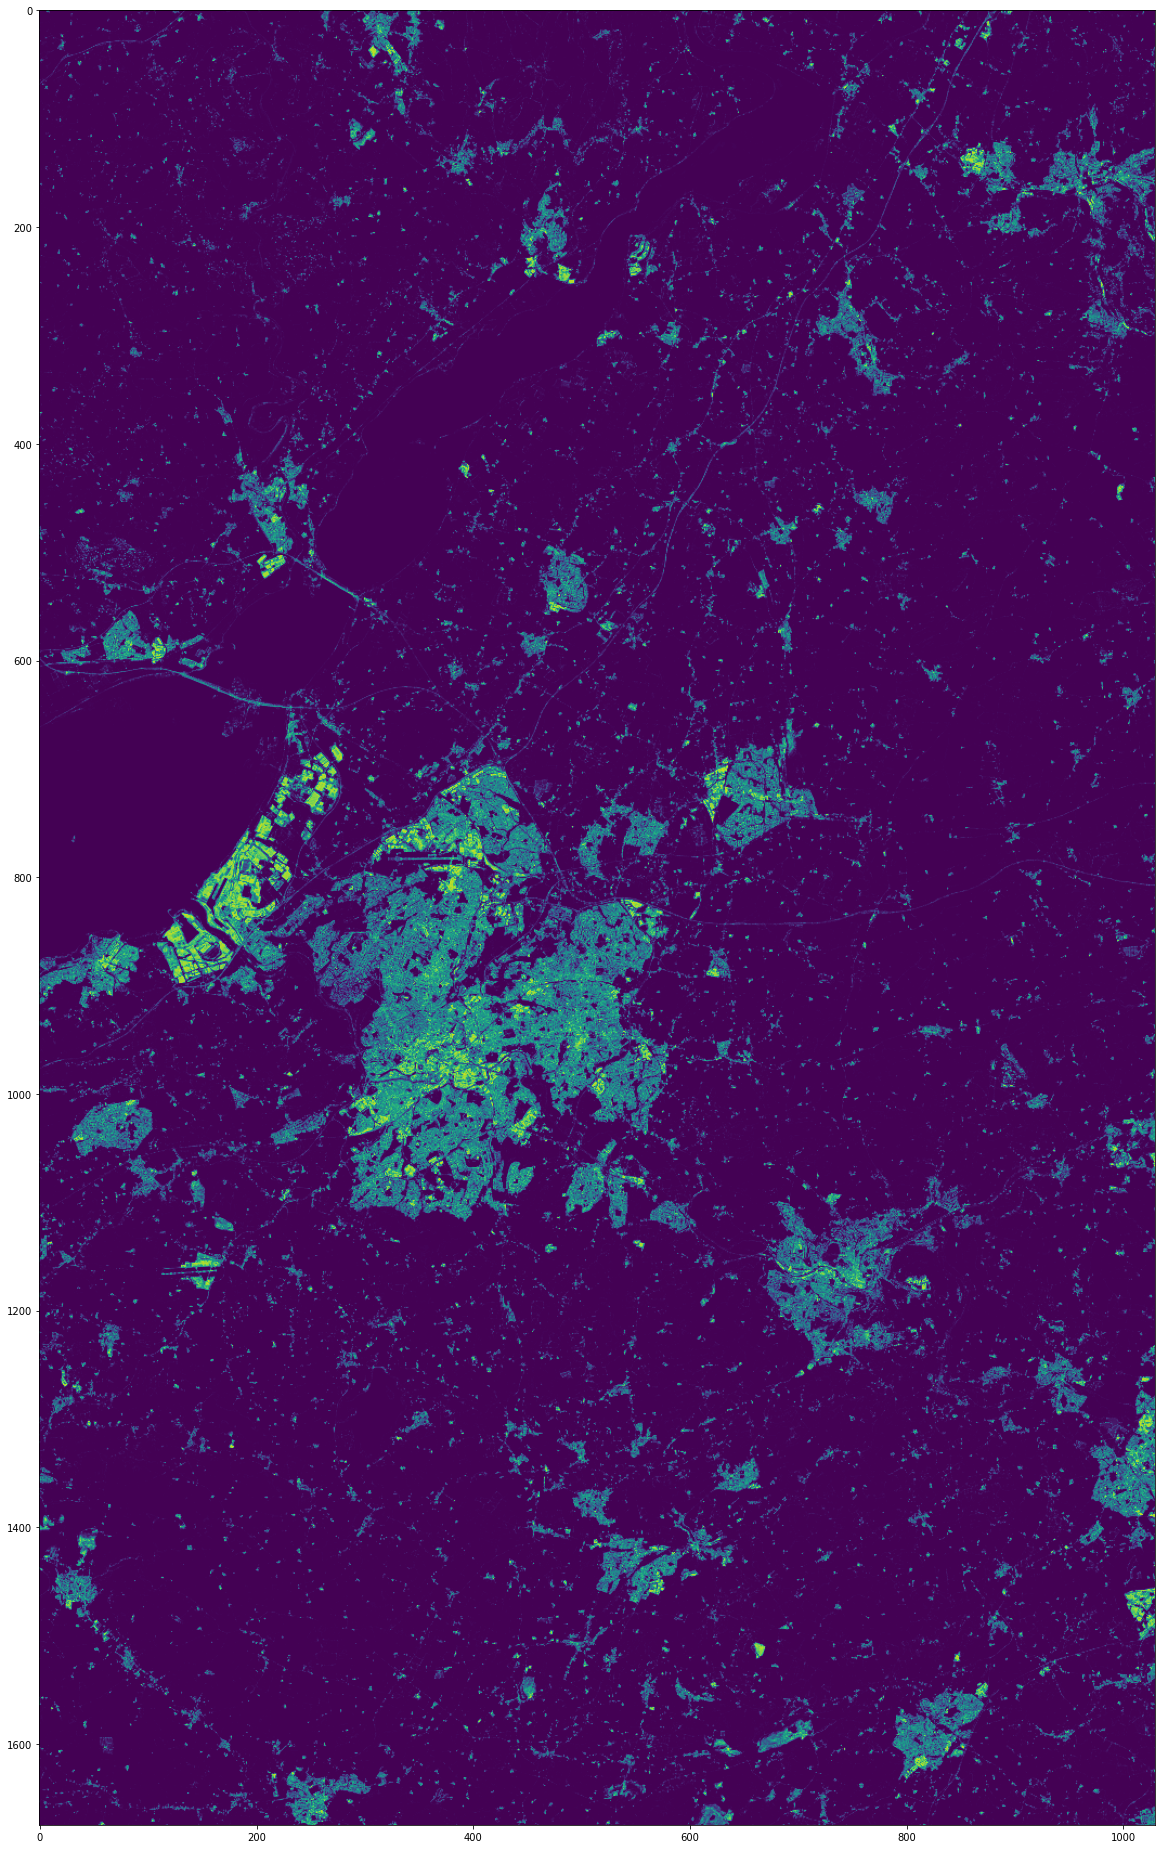

In [5]:
import matplotlib.pyplot as plt
import numpy as np

data = byoc_data[ 0 ]

plt.figure( figsize = (20,100) )
plt.imshow( data[ :, :, 0 ], vmin=0, vmax=100  )

(0.0, 10000.0)

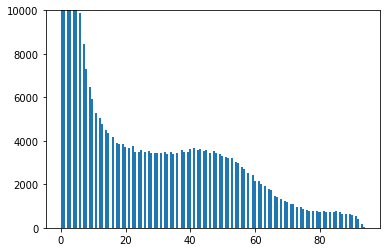

In [6]:
plt.hist( data.flatten(), bins=150 )
plt.ylim(0,10000)

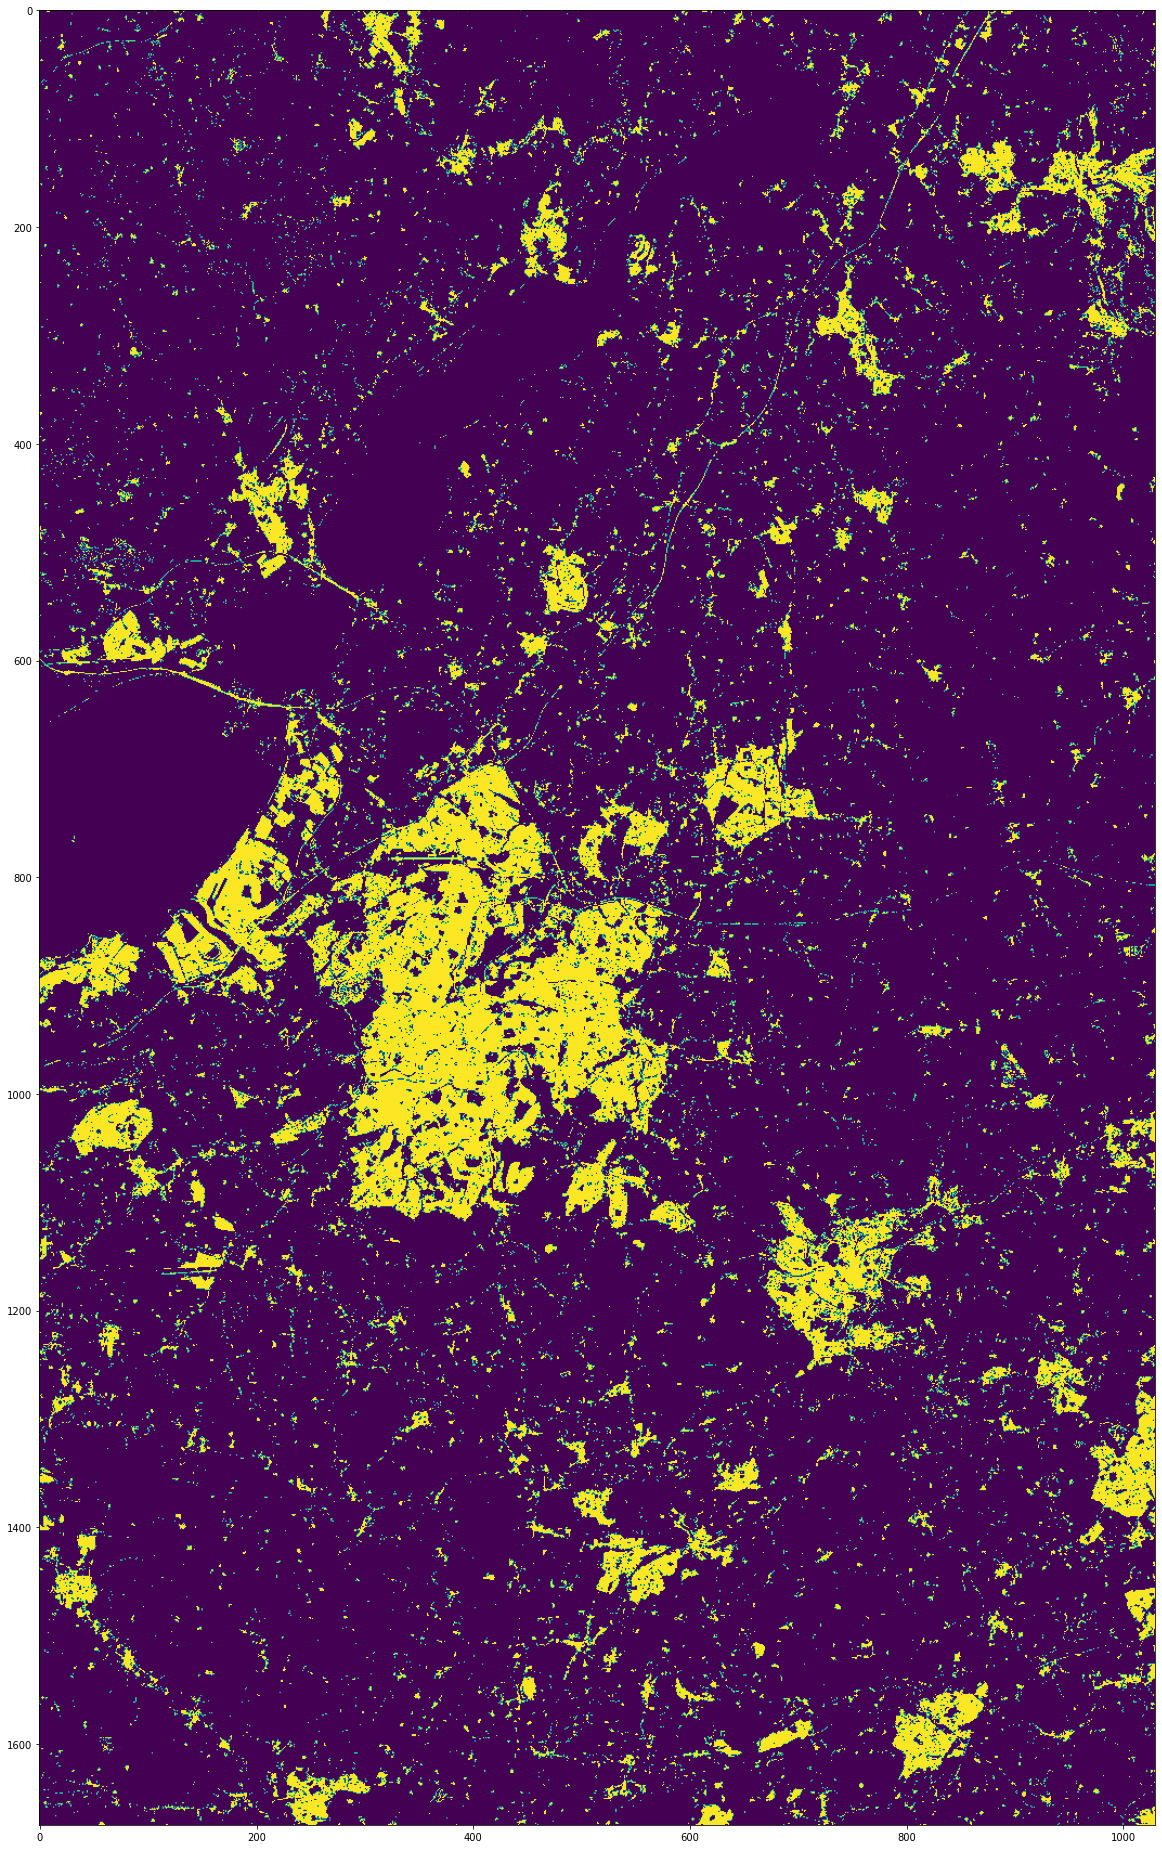

In [7]:
urban = data[ :, :, 0 ] > 10

plt.figure( figsize = (20,100) )
plt.imshow( urban )

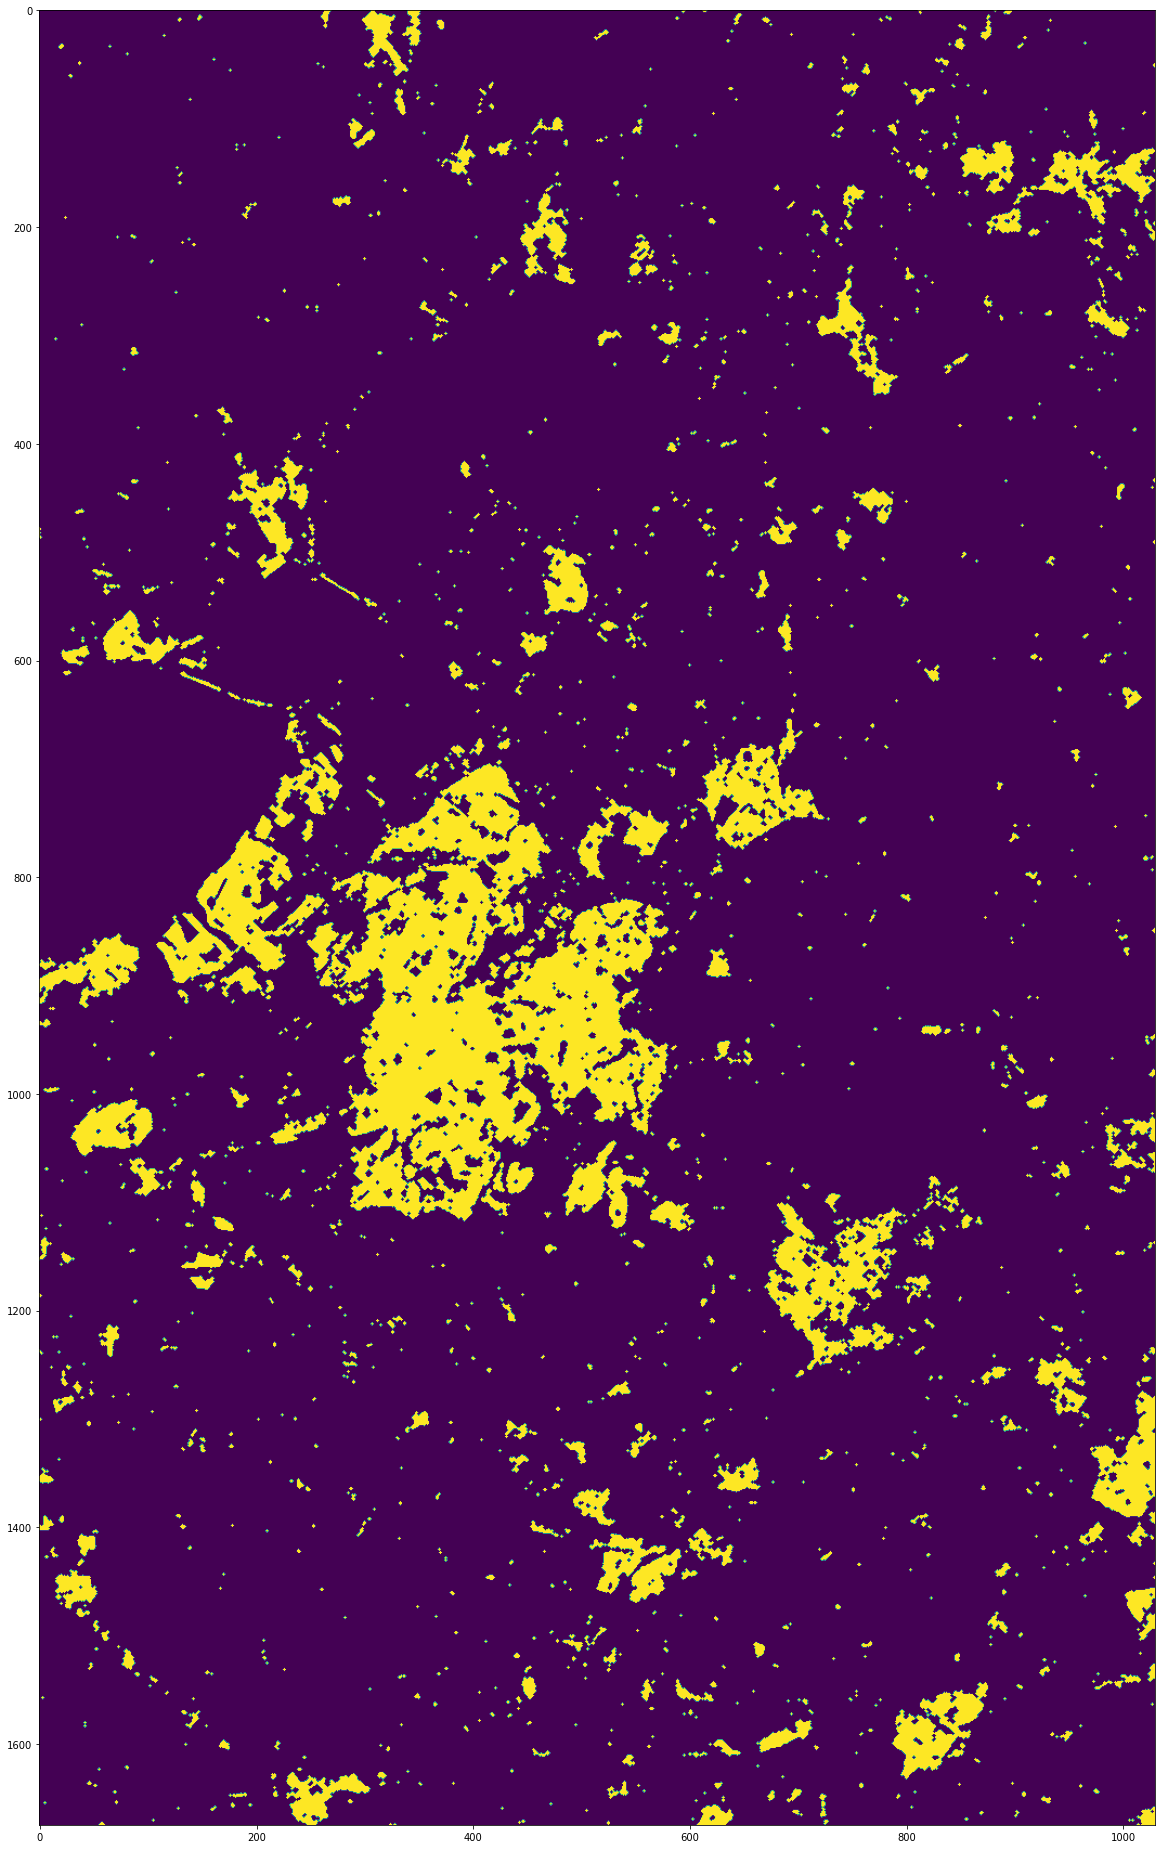

In [8]:
import numpy as np
from skimage.morphology import (erosion, dilation, closing, opening,
                                area_closing, area_opening)

element = np.array([[0,0,0,0,0,0,0],
                    [0,0,1,1,1,0,0],
                    [0,1,1,1,1,1,0],
                    [0,1,1,1,1,1,0],
                    [0,1,1,1,1,1,0],
                    [0,0,1,1,1,0,0],
                    [0,0,0,0,0,0,0]])

def multi_dilation(im, num, element=element):
    for i in range(num):
        im = dilation(im, element)
    return im

def multi_erosion(im, num, element=element):
    for i in range(num):
        im = erosion(im, element)
    return im

out = closing( opening( urban ) )
plt.figure( figsize = (20,100) )
plt.imshow( out )